# Aviation Accidents Analysis

## 1. Overview

A company I am working with is planning to diversify its portfolio by exploring new areas, particularly the aviation industry. The leadership is interested in the risks associated with aircraft operations, mainly safety and reliability. It is on that background that as a senior data scientist in the company that the management tusked me with the responsibility of carrying out data analysis to assist the management in making informed investment decisions to determine which aircraft presents the lowest operational risk.


## 2. Business Understanding
The company's goal is to identify the safest and most reliable aircraft to purchase based on an analysis of accident and incident data collected over the years. Therefore, the company wants to answer the following questions before taking any steps to make a purchase.
The company wants aircraft:

* That is not accident-prone/low accident frequency.
* If ever involved in an accident, then a low number of deaths and injuries.
* For aircraft that are frequently involved in accidents, who built their engines, and what models are they?
* Are the aircraft that are frequently accident-prone professionally or amateur-built?
* What are the leading causes of accidents? Are the causes attributed to the engine or other parameters, such as weather?

## 3. Data Science Understanding
Analyze accident data collected over the years to establish which aircraft has the lowest risk by using risk indicators such as accident frequency, fatality rate, and severity of injuries. This will answer the questions such as;
* Which aircraft models have the lowest number of reported accidents in the dataset?
* What is the accident rate per aircraft model, considering how often each model appears?
* For each aircraft model, what is the average and total number of fatalities and injuries per accident?
* Which aircraft models have the lowest injury and fatality rates in reported incidents?
* Among aircraft with high accident frequency, what are the common engine manufacturers and engine models?
* Is there a relationship between engine builder and accident frequency?
* What proportion of accident-prone aircraft were amateur-built vs. professionally built?
* How many of these causes are related to the engine, pilot error, weather conditions, or other external factors?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Loading accident data to the notebook
aviation_data = pd.read_csv("../Data/AviationData.csv", index_col = 0, encoding = "latin1", low_memory = False)

### 3.1 exploring data

In [3]:
aviation_data.head() # checking the first five rows of the dataframe

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_data.tail() # chwcking the last five rows of the dataframe

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
aviation_data.info() # getting concise information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

All the columns have missing values except the first three.

In [6]:
aviation_data.shape # checking the dataframe dimensions, i.e number of rows and cloumns in the dataframe.

(88889, 30)

Dataset contains 88,889 rows and 30 columns.

## 4. Data Preparation and cleaning

### 4.1 Checking for missing values

In [7]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [8]:
# checking for number of missing values per a column
aviation_data.isnull().sum() 

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

In [9]:
missing_values_percentage= aviation_data.isnull().mean().sort_values(ascending = False) * 100
missing_values_percentage

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Accident.Number            0

In [10]:
# columns with more than 60 percent missing values
columns_to_drop = missing_values_percentage.head(6) 
columns_to_drop

Schedule             85.845268
Air.carrier          81.271023
FAR.Description      63.974170
Aircraft.Category    63.677170
Longitude            61.330423
Latitude             61.320298
dtype: float64

In [11]:
# Dropping columns that have more than 60 percent missing values
aviation_data = aviation_data.drop(columns= columns_to_drop.index)
aviation_data

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,N5142R,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,N1867H,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,N2895Z,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,N749PJ,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022


In [12]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Airport.Code            50132 non-null  object 
 6   Airport.Name            52704 non-null  object 
 7   Injury.Severity         87889 non-null  object 
 8   Aircraft.damage         85695 non-null  object 
 9   Registration.Number     87507 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type          

### 4.2 Filling the missing values

In [13]:
categorical_columns = ["Investigation.Type", "Accident.Number", "Event.Date", "Location", "Country", "Airport.Code", "Airport.Name", "Injury.Severity", "Aircraft.damage", "Registration.Number", "Make", "Model", "Amateur.Built", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight", "Report.Status","Publication.Date"]
categorical_columns

['Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Purpose.of.flight',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [14]:
aviation_data[categorical_columns] = aviation_data[categorical_columns].fillna("unknown")
aviation_data

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,unknown
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,unknown,unknown,Fatal(3),Destroyed,N5142R,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,unknown,unknown,Minor,unknown,N1867H,...,NaN,Personal,0.0,1.0,0.0,0.0,unknown,unknown,unknown,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,unknown,unknown,unknown,unknown,N2895Z,...,NaN,unknown,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,N749PJ,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,unknown,unknown,27-12-2022


In [15]:
aviation_data.sample(10)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X42522,Accident,MIA83LA087,1983-03-18,"ST. PETERSBURG, FL",United States,PIE,ST. PETERSBURG,Non-Fatal,Substantial,N9020M,...,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Maneuvering,Probable Cause,unknown
20001214X44490,Accident,CHI83LA444,1983-09-27,"SANDWICH, IL",United States,C48,SANDWICH,Non-Fatal,Substantial,N54967,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,unknown
20001206X02250,Accident,FTW94LA297,1994-09-13,"MONTROSE, AR",United States,unknown,unknown,Non-Fatal,Substantial,N4607C,...,Turbo Prop,Aerial Application,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,27-03-1995
20001214X35848,Accident,BFO85FA032,1985-03-30,"ROANOKE, VA",United States,ROA,ROANOKE MUNI,Non-Fatal,Substantial,N8233R,...,Reciprocating,Business,NaN,1.0,NaN,NaN,VMC,Cruise,Probable Cause,unknown
20150622X84004,Accident,WPR15LA196,2015-06-22,"Boulder City, NV",United States,unknown,unknown,Non-Fatal,Substantial,N35590,...,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,unknown,A total loss of engine power during cruise fli...,25-09-2020
20001213X27246,Accident,FTW89FA013,1988-11-04,W. CAMERON 617,unknown,WC61,W. CAMERON 617,Fatal(4),Destroyed,N355EH,...,Turbo Shaft,Unknown,4.0,2.0,0.0,0.0,VMC,Takeoff,Probable Cause,25-06-1990
20001214X35722,Accident,LAX85FJA03,1985-02-14,"HILO, HI",United States,unknown,unknown,Non-Fatal,Substantial,N58395,...,Turbo Shaft,Positioning,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,unknown
20001214X35807,Accident,ANC85LA049,1985-03-02,"DILLINGHAM, AK",United States,unknown,unknown,Non-Fatal,Destroyed,N1715U,...,Reciprocating,Unknown,0.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,unknown
20030110X00046,Accident,MIA03TA036,2003-01-02,"NEW PORT RICHEY, FL",United States,unknown,unknown,Non-Fatal,Substantial,N317LC,...,Turbo Shaft,Public Aircraft,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,28-04-2004


In [16]:
numericals_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]
numericals_columns

['Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Number.of.Engines']

In [17]:
aviation_data[numericals_columns] = aviation_data[numericals_columns].fillna(0)
aviation_data

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,unknown
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,unknown,unknown,Fatal(3),Destroyed,N5142R,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,N15NY,...,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,unknown,unknown,Minor,unknown,N1867H,...,NaN,Personal,0.0,1.0,0.0,0.0,unknown,unknown,unknown,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,unknown,unknown,unknown,unknown,N2895Z,...,NaN,unknown,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,N749PJ,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,unknown,unknown,27-12-2022


In [18]:
aviation_data.sample(10)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20010720X01468,Accident,FTW01LA165,2001-07-16,"BRIDGEPORT, TX",United States,1F9,Bridgeport Municipal,Non-Fatal,Substantial,N8454W,...,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,Landing,Probable Cause,20-02-2002
20001213X35378,Accident,LAX87LA059,1986-12-07,"DAVIS, CA",United States,unknown,unknown,Non-Fatal,Substantial,N25592,...,Reciprocating,Personal,0.0,0.0,1.0,1.0,VMC,Cruise,Probable Cause,10-03-1988
20060120X00099,Accident,LAX06WA077,2006-01-02,"Brisbane, Australia",Australia,unknown,unknown,Fatal(5),Destroyed,unknown,...,NaN,Skydiving,5.0,2.0,0.0,0.0,VMC,unknown,Foreign,20-01-2006
20160711X00156,Accident,CEN16LA263,2016-07-09,"Newark, IL",United States,0C8,Cushing Field LTD airport,Fatal,Substantial,N9912S,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,unknown,The student pilot's failure to maintain direct...,25-09-2020
20080514X00667,Incident,DCA08IA033,2008-01-25,"Newark, NJ",United States,EWR,Newark Liberty Intl,Non-Fatal,unknown,N462UA,...,Turbo Fan,unknown,0.0,0.0,0.0,107.0,VMC,unknown,a fault in the airplane's AC 1 electrical bus ...,25-09-2020
20001214X38427,Accident,LAX86FA063,1985-12-09,"INDEPENDENCE, CA",United States,unknown,unknown,Fatal(2),Destroyed,N737SG,...,Reciprocating,Business,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,unknown
20040415X00472,Accident,LAX04LA174,2004-03-27,"LA VERNE, CA",United States,KPOC,La Verne,Non-Fatal,Substantial,N81MF,...,Turbo Prop,Personal,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,31-01-2006
20001213X30788,Accident,MKC87LA091,1987-04-25,"N LITTLE ROCK, AR",United States,1M1,MUNICIPAL,Non-Fatal,Destroyed,N1718W,...,Reciprocating,Ferry,0.0,0.0,1.0,0.0,VMC,Cruise,Probable Cause,10-03-1988
20001208X07834,Accident,SEA97LA095,1997-04-26,"PULLMAN, WA",United States,PUW,PULLMAN-MOSCOW,Non-Fatal,Substantial,N73934,...,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Taxi,Probable Cause,24-04-1998


### 4.3 Checking for Duplicates

In [19]:
duplicates = aviation_data[aviation_data.duplicated()]
print(len(duplicates))
duplicates.head()

0


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,


### 4.4 Checking for extraneouse values

In [20]:
for col in aviation_data.columns:
    print(col, '\n', aviation_data[col].value_counts(normalize=True).head(), '\n\n')

Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004882
MIAMI, FL          0.002250
ALBUQUERQUE, NM    0.002205
HOUSTON, TX        0.002171
CHICAGO, IL        0.002070
Name: proportion, dtype: float64 


Country 
 Country
United States     0.925289
Brazil            0.004207
Canada            0.004039
Mexico            0.004027
United Kingdom    0.003870
Name: proportion, dtype: float64 


Airport.Code 
 Airport.Code
unknown    0.436016
NONE       0.016740
PVT        0.005456
APA        0.001800
ORD        0.001676
Name: pro

In [21]:
# confirming if there are still missing values in the data
aviation_data.isnull().sum().sort_values(ascending=False).head(10)

Engine.Type               7096
Investigation.Type           0
Accident.Number              0
Report.Status                0
Broad.phase.of.flight        0
Weather.Condition            0
Total.Uninjured              0
Total.Minor.Injuries         0
Total.Serious.Injuries       0
Total.Fatal.Injuries         0
dtype: int64

There are 7096 missing values in Engine. Type columns.

In [22]:
# Handling the remaining missing values in the Engine.Type column

aviation_data['Engine.Type']= aviation_data['Engine.Type'].fillna("Unknown")
aviation_data


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,unknown
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,unknown,unknown,Fatal(3),Destroyed,N5142R,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,N15NY,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,unknown,unknown,Minor,unknown,N1867H,...,Unknown,Personal,0.0,1.0,0.0,0.0,unknown,unknown,unknown,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,unknown,unknown,unknown,unknown,N2895Z,...,Unknown,unknown,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,N749PJ,...,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,unknown,unknown,27-12-2022


In [23]:
aviation_data.isnull().sum().sort_values(ascending=False)

Investigation.Type        0
Accident.Number           0
Report.Status             0
Broad.phase.of.flight     0
Weather.Condition         0
Total.Uninjured           0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Fatal.Injuries      0
Purpose.of.flight         0
Engine.Type               0
Number.of.Engines         0
Amateur.Built             0
Model                     0
Make                      0
Registration.Number       0
Aircraft.damage           0
Injury.Severity           0
Airport.Name              0
Airport.Code              0
Country                   0
Location                  0
Event.Date                0
Publication.Date          0
dtype: int64

In [24]:
aviation_data.to_csv("cleaned_data.csv", index=False)

### Carrying out standardization on vital columns relevant in our analysis

These columns include Make, mode, location and injury severity

In [25]:
# Converting to Lower/uppercase
aviation_data["Make"] = aviation_data["Make"].str.upper()
aviation_data["Model"] = aviation_data["Model"].str.upper()
aviation_data["Location"] = aviation_data["Location"].str.title()  # Keep location readable
aviation_data["Injury.Severity"] = aviation_data["Injury.Severity"].str.title()

In [29]:
# Stripping Extra whitespace
aviation_data["Make"] = aviation_data["Make"].str.strip()
aviation_data["Model"] = aviation_data["Model"].str.strip()
aviation_data["Location"] = aviation_data["Location"].str.strip()

In [30]:
# Fixing typos
aviation_data["Make"] = aviation_data["Make"].replace({
    "CESSNA ": "CESSNA",
    "BOEING  ": "BOEING",
    "CESSNA AIRCRAFT": "CESSNA"
})

In [26]:
aviation_data["Country"].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 220, dtype: int64

Since majority of the cases are in the united states, I only going to concentrate on the united states.

In [27]:
us_data = aviation_data[aviation_data["Country"] == "United States"]
us_data.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"Moose Creek, Id",United States,unknown,unknown,Fatal(2),Destroyed,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,unknown
20001218X45447,Accident,LAX94LA336,1962-07-19,"Bridgeport, Ca",United States,unknown,unknown,Fatal(4),Destroyed,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, Va",United States,unknown,unknown,Fatal(3),Destroyed,N5142R,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"Eureka, Ca",United States,unknown,unknown,Fatal(2),Destroyed,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, Oh",United States,unknown,unknown,Fatal(1),Destroyed,N15NY,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [34]:
us_data.shape

(82248, 24)

In [28]:
# checking for missing values and data types
us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 20001218X45444 to 20221230106513
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      82248 non-null  object 
 1   Accident.Number         82248 non-null  object 
 2   Event.Date              82248 non-null  object 
 3   Location                82248 non-null  object 
 4   Country                 82248 non-null  object 
 5   Airport.Code            82248 non-null  object 
 6   Airport.Name            82248 non-null  object 
 7   Injury.Severity         82248 non-null  object 
 8   Aircraft.damage         82248 non-null  object 
 9   Registration.Number     82248 non-null  object 
 10  Make                    82248 non-null  object 
 11  Model                   82248 non-null  object 
 12  Amateur.Built           82248 non-null  object 
 13  Number.of.Engines       82248 non-null  float64
 14  Engine.Type          

In [41]:
us_data.to_csv("United_States_data.csv", index=False)

## United States Data Analysis

### Univariate Analysis

In [37]:
# Count the number of accidents by Aircraft Make/Model
aircraft_counts = us_data['Make'].value_counts().head(10)
aircraft_counts

Make
CESSNA      25853
PIPER       14168
BEECH        5059
BELL         2285
BOEING       1485
MOONEY       1293
GRUMMAN      1142
BELLANCA     1040
ROBINSON      919
HUGHES        874
Name: count, dtype: int64

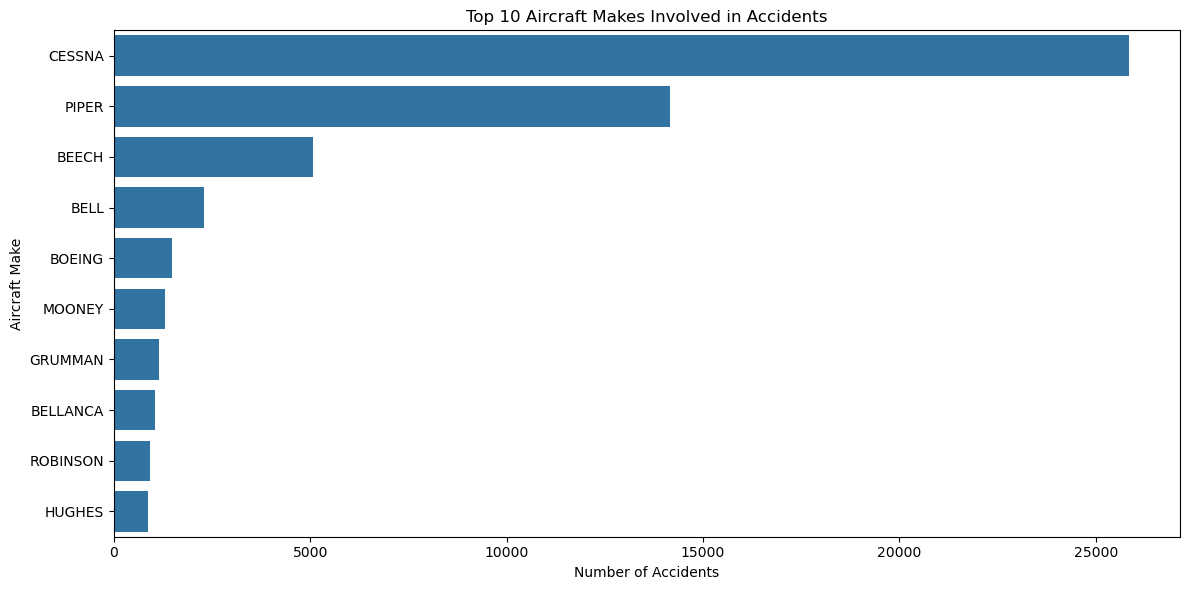

In [40]:

# visualizing accident counts by make
plt.figure(figsize=(12,6))
sns.barplot(x=aircraft_counts.values, y=aircraft_counts.index)
plt.title("Top 10 Aircraft Makes Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()